In [18]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [19]:
def readData(location):
  if(location == 1):
    y_train_obs_A = pd.read_parquet('data/A/train_targets.parquet')
    X_test_est_A = pd.read_parquet('data/A/X_test_estimated.parquet')
    X_train_est_A = pd.read_parquet('data/A/X_train_estimated.parquet')
    X_train_obs_A = pd.read_parquet('data/A/X_train_observed.parquet')
    return y_train_obs_A, X_test_est_A, X_train_est_A, X_train_obs_A
  elif(location == 2):
    y_train_obs_B = pd.read_parquet('data/B/train_targets.parquet')
    X_test_est_B = pd.read_parquet('data/B/X_test_estimated.parquet' )
    X_train_est_B = pd.read_parquet('data/B/X_train_estimated.parquet')
    X_train_obs_B = pd.read_parquet('data/B/X_train_observed.parquet')
    return y_train_obs_B, X_test_est_B, X_train_est_B, X_train_obs_B
  else:
    y_train_obs_C = pd.read_parquet('data/C/train_targets.parquet')
    X_test_est_C = pd.read_parquet('data/C/X_test_estimated.parquet')
    X_train_est_C = pd.read_parquet('data/C/X_train_estimated.parquet')
    X_train_obs_C = pd.read_parquet('data/C/X_train_observed.parquet')
    X_c = pd.concat([X_train_est_C, X_train_obs_C])
    return y_train_obs_C, X_test_est_C, X_train_est_C, X_train_obs_C

In [20]:
y_a, X_test_A, X_train_A_est, X_train_A_obs = readData(1)
y_b, X_test_B, X_train_B_est, X_train_B_obs= readData(2)
y_c, X_test_C, X_train_C_est, X_train_C_obs = readData(3)

C:\Users\claxl\AppData\Local\Temp\ipykernel_19020\2859277286.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


absolute_humidity_2m:gm3     air_density_2m:kgm3   -0.811630
                             dew_point_2m:K         0.974607
                             t_1000hPa:K            0.907083
air_density_2m:kgm3          dew_point_2m:K        -0.845869
                             t_1000hPa:K           -0.917245
ceiling_height_agl:m         cloud_base_agl:m       0.709431
clear_sky_energy_1h:J        clear_sky_rad:W        0.992517
                             diffuse_rad:W          0.912133
                             diffuse_rad_1h:J       0.923205
                             direct_rad:W           0.725202
                             direct_rad_1h:J        0.737702
                             is_day:idx             0.646241
                             is_in_shadow:idx      -0.687676
                             sun_elevation:d        0.835068
clear_sky_rad:W              diffuse_rad:W          0.918115
                             diffuse_rad_1h:J       0.915686
                        

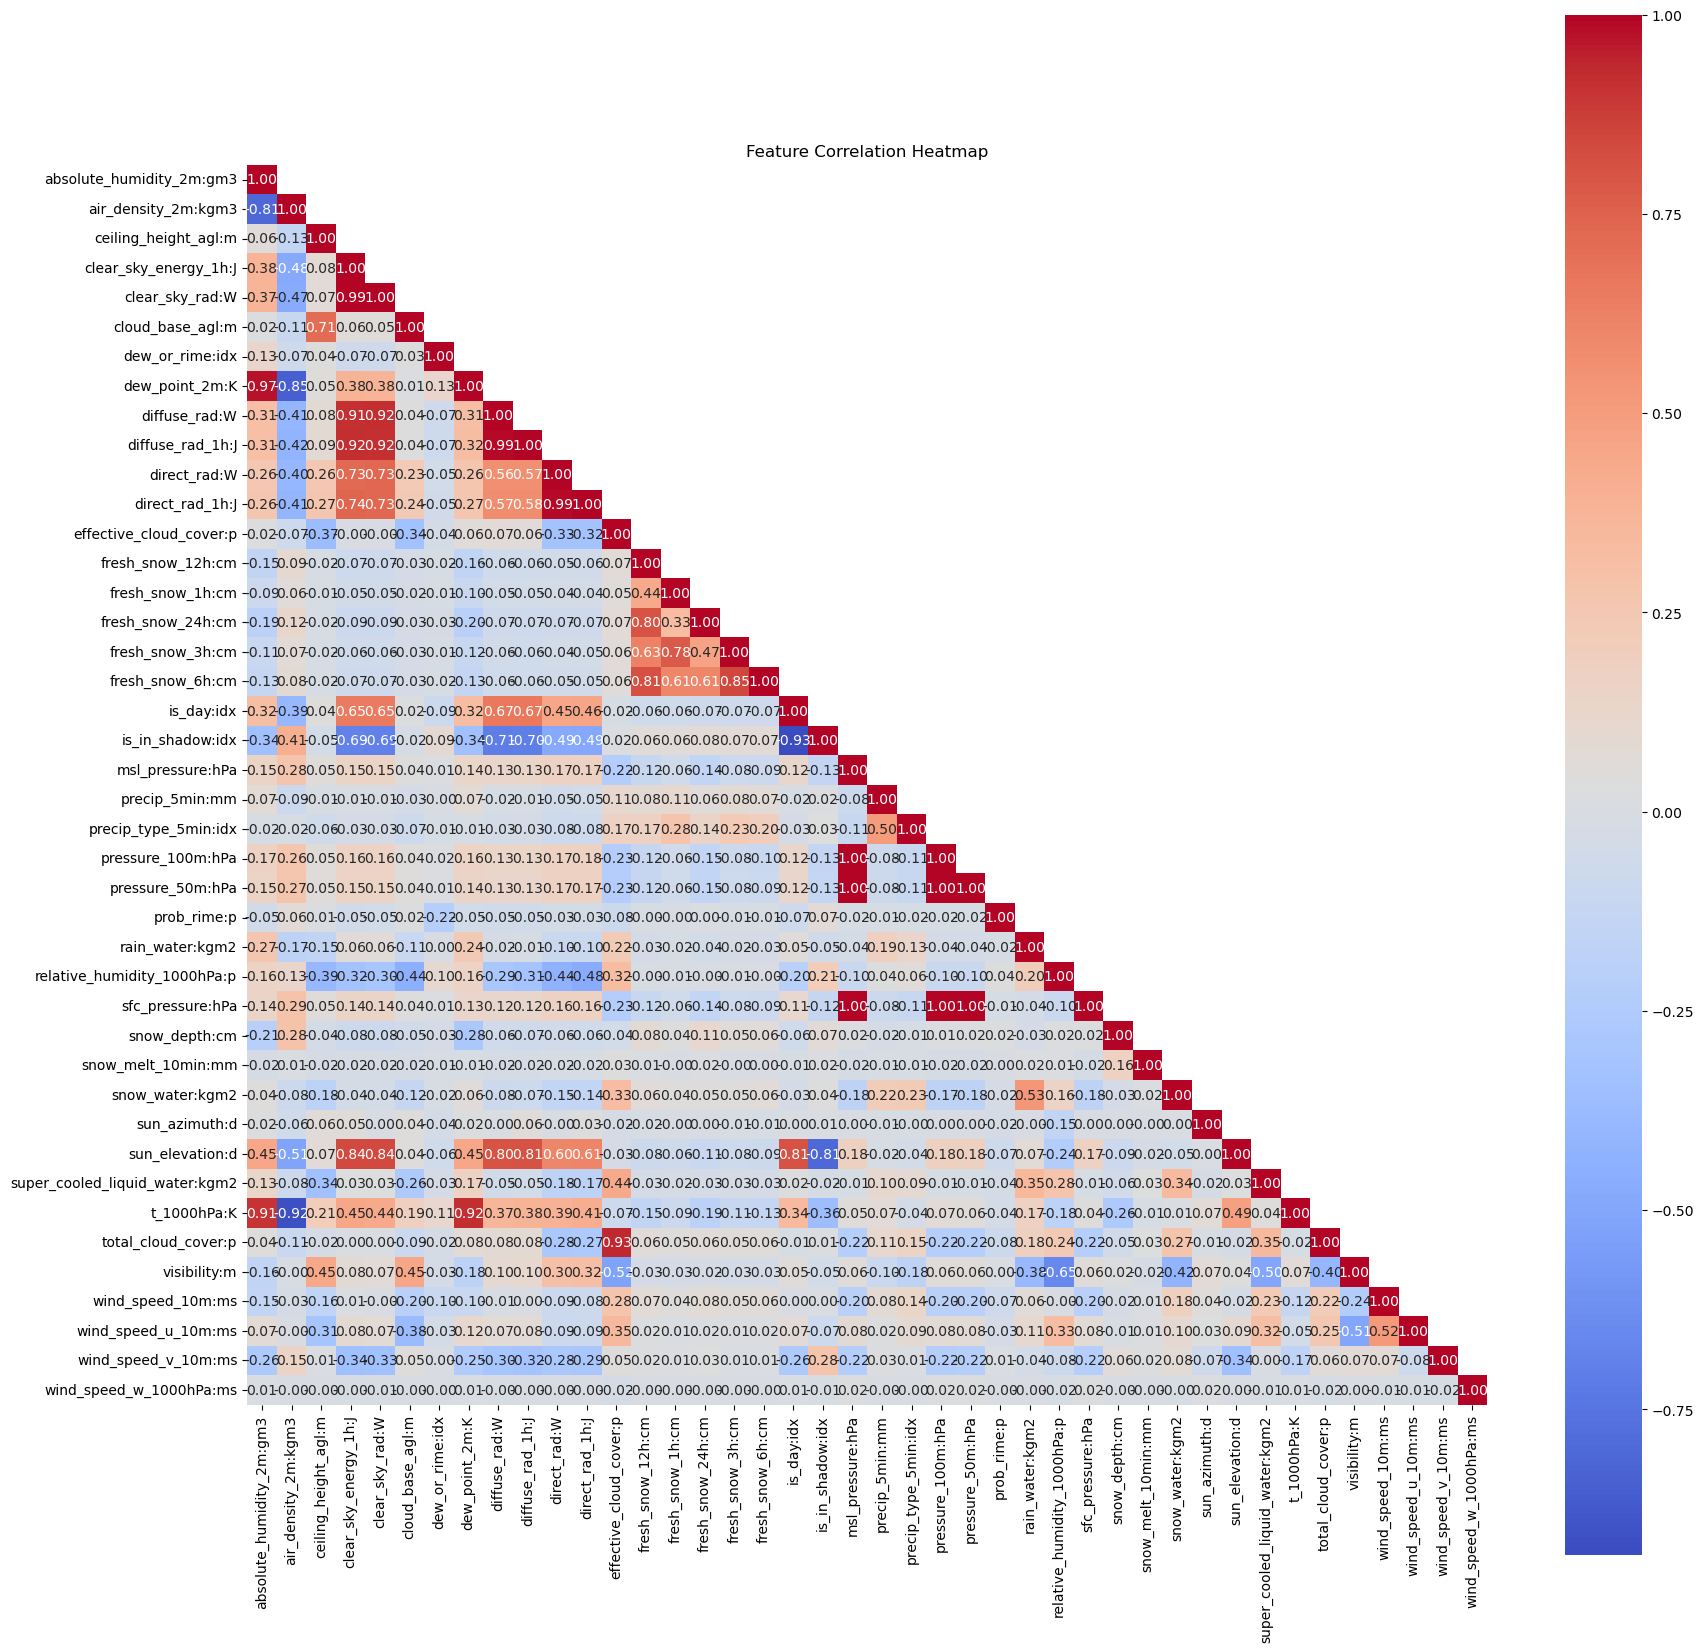

In [21]:
#Training, validation and test
X_train_observed_a = X_train_A_obs.drop(columns =["elevation:m", "snow_density:kgm3", "snow_drift:idx"]).copy()
X_train_estimated_a = X_train_A_est[:int(X_train_A_est.shape[0] * 3 / 4)].drop(columns =["elevation:m", "snow_density:kgm3", "snow_drift:idx"]).copy()
X_valid_estimated_a = X_train_A_est[int(X_train_A_est.shape[0] * 3 / 4):int(X_train_A_est.shape[0] * 9 / 10)].drop(columns =["elevation:m", "snow_density:kgm3", "snow_drift:idx"]).copy()
X_test_estimated_a = X_train_A_est[int(X_train_A_est.shape[0] * 9 / 10):].drop(columns =["elevation:m", "snow_density:kgm3", "snow_drift:idx"]).copy()

df = pd.concat([X_train_observed_a, X_train_estimated_a], ignore_index=True)

#df = X_train_engineered

# Compute the correlation matrix
corr_matrix = df.corr()

# Create mask for upper triangle of the matrix
mask_upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Filter out correlations based on the range
strongly_correlated_pairs = corr_matrix.where(
    mask_upper & ((corr_matrix >= 0.6) | (corr_matrix <= -0.6))
).stack()

print(strongly_correlated_pairs)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, square=True, fmt='.2f', mask=mask_upper)
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
def resize_training_data(X_train, y_train):
    y_features = y_train.columns.tolist()
    X_date_feature = "date_forecast"
    
    merged = pd.merge(X_train, y_train,left_on=X_date_feature, right_on='time', how='inner')
    y_train_resized = merged[y_features]
    columns_to_drop = y_features + [X_date_feature]
    X_train_resized = merged.drop(columns = columns_to_drop)
    return X_train_resized, y_train_resized

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_scaled_features, df_target = resize_training_data(X_train_A_obs, y_a)
target_column = 'pv_measurement'
df_features = df_scaled_features.map(lambda x: np.sqrt(x) if x > 0 else x)

# Adjusting the style of the plots
sns.set(style="whitegrid")



AttributeError: 'DataFrame' object has no attribute 'map'